### 보스톤 집 가격

사이킷런 모듈에서 제공하는 여러개의 데이터셋 중에서 선형회귀로 사용할 수 있는 보스톤 집 가격 데이터가 있습니다.



In [1]:
# 데이터 로딩
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# 에이터 피처 이름 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

### 피처 선택

간단한 실습을 위해서 여러개의 피처 중에서 6 번쨰 피처인 주거지의 평균 방 갯수 하나를 선택해서 회귀를 실습해보겠습니다.

In [5]:
x = boston.data[:,5]

In [8]:
print('데이터 살펴보기')
x[:10]

데이터 살펴보기


array([ 6.575,  6.421,  7.185,  6.998,  7.147,  6.43 ,  6.012,  6.172,
        5.631,  6.004])

In [9]:
print('데이터 크기 : ', len(x), len(boston.target))


데이터 크기 :  506 506


### 데이터 시각화

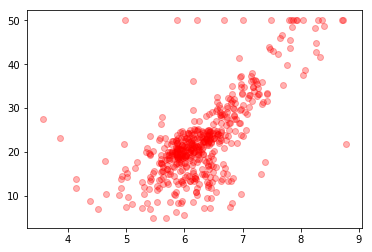

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x, boston.target, color='r', alpha=0.3)
plt.show()

## 선형회귀

sklearn.linear_model 에 있는 LinearRegression 클래스르 사용해서 선형회귀를 하겠습니다.

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()

x = boston.data[:,5]
y = boston.target

# print(x.shape, y.shape)

x = x.reshape(-1,1)# x = np.transpose(np.atleast_2d(x))
lr.fit(x, y)
y_predicted = lr.predict(x)

## 회귀 결과 시각화

아래는 제가가 선형회귀 결과를 시각화하기 위해서 만든 그래프 함수입니다.

자주 사용하는 기능은 함수를 만들어서 모듈화해두면 편하게 사용할 수 있습니다.

In [23]:
def plot_linear(X, Y, lr=None):
    import matplotlib.ticker as ticker
    width = np.max(X) - np.min(X)
    delta = width * 0.05
    xmin = np.min(X)-delta
    xmax = np.max(X)+delta
    fig, ax = plt.subplots(figsize=plt.figaspect(1))
    ax.plot(X, Y, 'ro', alpha=0.3)
    ax.set_xlim(xmin, xmax)
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.grid()
    if not lr is None:
        x_lin = np.linspace(xmin, xmax, 100).reshape(-1,1)
        lr.fit(X, Y)
        pred = lr.predict(x_lin)
        ax.plot(x_lin, pred, 'b-', lw=3, alpha=0.6)

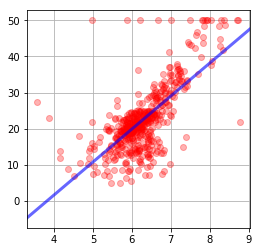

In [24]:
plot_linear(x, y, lr=lr)
plt.show()

## 오류에 대한 평가

예측값과 실제값이 얼마나 가까운지를 판단하는 기준으로 mean squared error 를 배웠습니다.  예측값과 실제값의 차이의 제곱에 대한 평균값입니다.

먼저 이 계산부터 해보겠습니다.

In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_predicted)
print("Mean squared error : {:.3}".format(mse))

Mean squared error : 43.6


조금 더 해석하기 쉬운 수치는 Root Mean Squared Error 입니다.

In [27]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error : {:.3}".format(rmse))

Root Mean Squared Error : 6.6


## RMSE 에 대한 해석

정규분포에서는 평균값을 중심으포 표준편차의 2배의 범위에 샘플이 존재할 확률이 95% 가량 됩니다. 위 보스톤 집 가격 샘플에서도 회귀직선에서 6.6 * 2 = 13.2 정도의 오차 범위에서 합리적인 예측이 가능하다고 이야기할 수 있습니다.

집 가격을 나타내는 단위는 1000 달려이므로 13.200 달러 정도의 오차를 예상할 수 있다고 해석합니다.

## 결정 계수 coefiicient of determination

RMSE 수치가 0 에 가까울 수록 정확하게 예측한 것이지만 실제로는 그런 일은 없습니다.

RMSE 의 절대적인 수치만으로 모델을 정확도를 해석하기는 어렵습니다.

다른 해석방법 중의 하나는 coefficient of determination 을 계산하는 것입니다.

이 방법에서는 모든 입력값에 대해서 타겟값(y)의 산술평균을 예측하는 null model 의 표준편차와 회귀 모델에 의한 표준편차를 비교합니다.

완벽한 회귀 모델에서는 이 값은 1이고, null model 에서는 0 이 됩니다.

null model 보다 성능이 안 좋은 모델에서는 이 값이 음수가 되기도 합니다.

$1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y_i})^2}$

이 결정계수는 sklearn.metrics 모듈의 r2_score 함수를 사용하거나  LinearRegression 클래스의 score 메쏘드를 사욯하고  $R^2$점수라고 부릅니다.

In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y, lr.predict(x))
print('R2 socre (train) : {:.2}'.format(r2))

R2 socre (train) : 0.48


## 다차원 회귀

이번에는 원래 데이터의 모든 피처를 사용해서 분류기의 성능을 높여보겠습니다.

In [29]:
len(boston.feature_names)

13

총 13개의 피처입니다.

In [30]:
x = boston.data
y = boston.target
lr = LinearRegression().fit(x, y)


In [31]:
r2 = r2_score(y, lr.predict(x))
print('R2 socre (train) : {:.2}'.format(r2))

R2 socre (train) : 0.74


 R2 점수가 0.74로 높아졌습니다.   1에 가까울 수록 정확한 예측을 한 것입니다.

## 교차 검증

지금까지 실습한 회귀에 대한 평가에 훈련시킨 데이터를 그대로 사용했습니다.

이 경우 overfitting 은 문제가 생깁니다.  새로운 데이터에 대해서는 모델의 일반화 능력이 떨어진다는 의미입니다.

그래서 보통 데이터셋을 훈련용 데이터와 테스트용 데이터로 나눠서 테스트 데이터를 모델 평가용으로 사용합니다.

사이킷런에서는 n-fold 교차 검증을 지원하기 위한 sklearn.cross_validation.Kforld 클래스를 제공합니다.   데이터를 랜덤하게 n 개의 조각으로 나눠서 각 조각 하니씩을 테스트용으로 나머지 조각을 훈련용으로 사용하게 합니다.


아래가 그 활용예입니다.

In [54]:
from sklearn.model_selection import KFold
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=False)
pred = np.zeros_like(y)

for train_idx, test_idx in kf.split(x):
    lr.fit(x[train_idx], y[train_idx])
    pred[test_idx] = lr.predict(x[test_idx])

rmse_cv = np.sqrt(mean_squared_error(y, pred))
print('RMSE on 5-fold CV : {:.2}'.format(rmse_cv))

RMSE on 5-fold CV : 6.1


## Regularization

Penalized regression 또는 Regularized regression 라고 부르는 overfitting 을 방지하기 위한 방법이 있습니다.

기본 아이디어는 각 피처의 파라미터(가중치)가 크면 클 수록 벌점을 주어서 어느정도 작게 만드는 것입니다.

벌점을 부과하는 방법에는 L1 과 L2 두 가지 방법이 있고 각각의 방법에 따라서 Lasso 회귀, Ridge 회귀라고 구분해서 부릅니다.

L1 에서는 가중치의 절대값에 비례해서 벌점을 부과하는 것이고,

L2 에서는 가중치의 제곱에 비례해서 벌점을 부과합니다.

이 두가지 방법을 섞은 ElasticNet 클래스를 사이킷런에서 사용할 수도 있습니다.

Lasso 회귀에서는 일부 피처의 가중치를 0으로 만들기 때문에 일부 피처를 골라는 feature selection 기능도 수행합니다.

Lasso 와 Ridge 모두 모델을 만들 떄 얼마나 패널티를 부과할지에 대한 상수를 alpha 라는 인자로 넣습니다. 

알파값이 클 수록 모델의 일반화 정도가 커지고 알파가 0 이라면 앞서 실습한 모델과 같아집니다.



## Lasso 회귀의 가중치 시각화

In [57]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path

lasso = Lasso(normalize=True)
alphas = np.logspace(-5,2,1000)
alphas, coefs, _ = lasso.path(x, y, alphas=alphas)


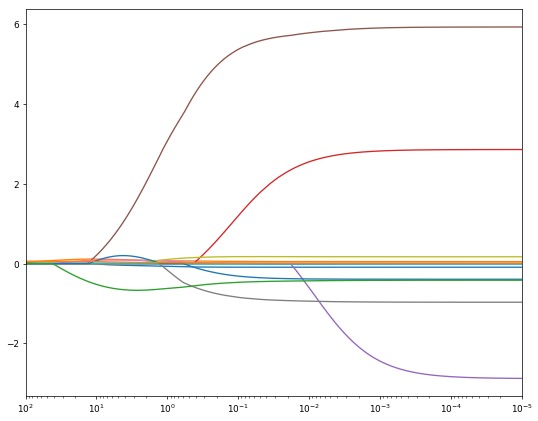

In [65]:
fig, ax = plt.subplots(dpi=64, figsize=(10,8))
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
plt.show()

## 그래프 해석

위 그래프의 13개의 선은 입력 데이터의 13개의 피처에 해당합니다.

벌점을 크게 부여할 수록 모든 가중치는 0 에 가까워집니다.

모든 그래프 범위에서 가중치가 거의 0 에 가까운 피처들이 있습니다.

집 가격에 영향을 안 주는 피처들로 해석합니다.

위 그래프를 각 alpha 값에서  유요한 수치 이상의 가중치의 갯수가 Lasso 회귀에 실질적으로 사용된다고 해석할 수 있습니다.

예를 들어 위의 그래프에서 보면 alpha 가 1 인 경우에는 2 개의 피처만 사용해서 회귀를 합니다.



## 파라미터 튜닝

이번 노트에서의 실습 목적은 선형회귀와 패널치를 부과한 회귀의 연습입니다.

파라미터 튜닝을 할 때는 교차검증 데이터셋을 따로 지정을해야하지만 이번 실습의 목적과는 거리가 있으므로 다음에 다둬보기로 하고 전체 데이터를 overfitting 을 감한하고 파라미터 튜닝을 해보겠습니다.

아래는 Lasso 회귀에서 어떤 alpha 값을 주어야지 더 정확한 예측값을 얻을 수 있을지에 대한 코드입니다.

In [67]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-5,2,10)
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(x, y)

LassoCV(alphas=array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [73]:
lasso_cv.alpha_

0.4641588833612782

교차 검증에서는 1e-5 부터 1e2 까지의 범위를 로그 스케일로 10개의 위치를 지정해서 alpha 값으로 사용했습니다.

그 결과는 alpha = 0.46 정도 일때 Lasso 모델에서 가장 좋은 성능을 보였습니다.

In [75]:
r2 = r2_score(y, lasso_cv.predict(x))
print('R2 socre (lasso_cv) : {:.2}'.format(r2))

R2 socre (lasso_cv) : 0.72


이번에도 R2 값을 계산해봤습니다.  모든 피철르 사용하고 alpha 가 0 인 경우에는 0.74 였습니다. 이 보다는 적확도는 약간 떨어졌는데, 패널티를 부과한 모델이므로 납득이 가는 결과입니다.